In [19]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [13]:
Base = automap_base()

In [14]:
Base.prepare(engine, reflect=True)

In [15]:
Base.classes.keys()

['measurements', 'station']

In [17]:
Station = Base.classes.station
Measurements = Base.classes.measurements
session = Session(engine)

In [47]:
months_12 = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(months_12)

('2017-08-23',)


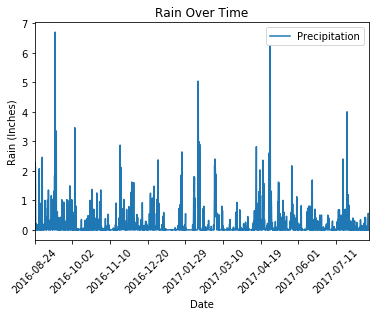

In [52]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
rain = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()
rain_df = pd.DataFrame(rain)
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain (Inches)")
plt.title("Rain Over Time")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
total = session.query(Measurements).group_by(Measurements.station).count()
print(total)

In [64]:
busy_stations = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()

for station, count in busy_stations:
    print(station,":", count)
    

USC00519281 : 2772
USC00519397 : 2724
USC00513117 : 2709
USC00519523 : 2669
USC00516128 : 2612
USC00514830 : 2202
USC00511918 : 1979
USC00517948 : 1372
USC00518838 : 511


In [63]:
highest = busy_stations[0][0]
print(highest)

USC00519281


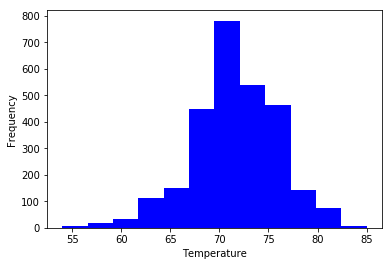

In [96]:
temperatures = session.query(Measurements.station, Measurements.date, Measurements.tobs).filter(Measurements.station == busy_station[0][0]).filter(Measurements.date > last_year).order_by(Measurements.date).all()   
temp_df=pd.DataFrame(temperatures)
plt.hist(temp_df['tobs'],12,color='blue')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [95]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
temp_range = (calc_temps('2012-02-28', '2012-03-05'))
print(temp_range)

[(62, 69.57142857142857, 74)]


In [94]:
trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67, 74.47368421052632, 82)]


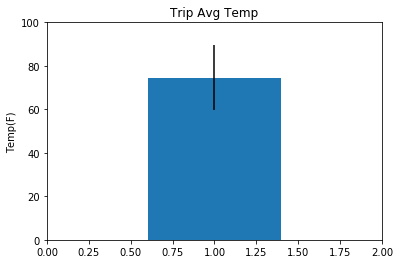

In [93]:
p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, yerr=p2p)
ax.set_ylabel("Temp(F)")
ax.set_title("Trip Avg Temp")
       
plt.ylim(0, 100)
plt.xlim(0,2)
plt.show()